In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

from valueinvesting import utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = True
X=10
currency_pair = 'USD=X'
numbers_in_currency = 'USD'
share_name = 'INTC'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount

# 1.2. Raw input statement data

In [3]:
route = f"../data/input/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date', 'real_date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [4]:
owned_shares = pd.read_csv('../data/extras/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares,real_date
0,2014-09-30,14554,-5096,9458,3317,3143,3647,4115,27509,10556,...,2597,0,1164,14904,12103,34543,5693,-2445,5056,2014-10-27
1,2014-12-31,14721,-5100,9621,3661,2561,4427,4273,27730,10861,...,2748,508,1088,16011,12059,36035,5771,-2235,5056,2015-01-27
2,2015-03-31,12781,-5051,7730,1992,4244,3246,4418,26466,10766,...,2775,0,1121,15035,12112,33734,4415,-2025,4894,2015-04-27
3,2015-06-30,13195,-4947,8248,2706,4454,3860,4818,26710,11037,...,2359,23,1095,13529,12116,31892,3440,-1767,4894,2015-07-27
4,2015-09-30,14465,-5354,9111,3109,7065,4101,4965,36205,11026,...,2449,33,1096,15080,20059,40550,5735,-1206,4894,2015-10-27


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [7]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
36,2023-09-30,2023-10-27,4212,14158,-8140,6018,310,7621,2843,11466,...,4970,188837,8669,0,2288,28614,46591,87024,5824,-5753
37,2023-12-31,2024-01-27,4212,15406,-8359,7047,2660,7079,3402,11127,...,4589,191572,8578,0,2288,28053,46978,85982,4624,-6696
38,2024-03-31,2024-04-27,4234,12724,-7507,5217,-437,6923,3323,11494,...,4675,192733,8559,0,4581,27213,47869,86760,-1223,-5970
39,2024-07-01,2024-07-29,4267,12833,-8286,4547,-1654,11287,3131,11244,...,4383,206205,9618,0,4695,32027,48334,90976,2292,-5682
40,2024-09-30,2024-10-28,4292,13284,-11287,1997,-16989,8785,15301,12062,...,3975,193542,11074,0,3765,35159,46471,88678,4054,-6458


## Pull historical average USD national currency rates and add to the dataframe

In [8]:
if currency_pair != 'USD=X':
    data['usd_nat_currency'] = utils.daily_price(
        ticker=currency_pair,
        end=data['date'],
        days_earlier=90
        )
else:
    data['usd_nat_currency'] = [1 for x in range(len(data))]

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
36,2023-09-30,2023-10-27,4212,14158,-8140,6018,310,7621,2843,11466,...,188837,8669,0,2288,28614,46591,87024,5824,-5753,1
37,2023-12-31,2024-01-27,4212,15406,-8359,7047,2660,7079,3402,11127,...,191572,8578,0,2288,28053,46978,85982,4624,-6696,1
38,2024-03-31,2024-04-27,4234,12724,-7507,5217,-437,6923,3323,11494,...,192733,8559,0,4581,27213,47869,86760,-1223,-5970,1
39,2024-07-01,2024-07-29,4267,12833,-8286,4547,-1654,11287,3131,11244,...,206205,9618,0,4695,32027,48334,90976,2292,-5682,1
40,2024-09-30,2024-10-28,4292,13284,-11287,1997,-16989,8785,15301,12062,...,193542,11074,0,3765,35159,46471,88678,4054,-6458,1


## Convert USD values related to IS, BS, CFS to national currency

In [9]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
36,2023-09-30,2023-10-27,4212,14158.0,-8140.0,6018.0,310.0,7621.0,2843.0,11466.0,...,188837.0,8669.0,0.0,2288.0,28614.0,46591.0,87024.0,5824.0,-5753.0,1
37,2023-12-31,2024-01-27,4212,15406.0,-8359.0,7047.0,2660.0,7079.0,3402.0,11127.0,...,191572.0,8578.0,0.0,2288.0,28053.0,46978.0,85982.0,4624.0,-6696.0,1
38,2024-03-31,2024-04-27,4234,12724.0,-7507.0,5217.0,-437.0,6923.0,3323.0,11494.0,...,192733.0,8559.0,0.0,4581.0,27213.0,47869.0,86760.0,-1223.0,-5970.0,1
39,2024-07-01,2024-07-29,4267,12833.0,-8286.0,4547.0,-1654.0,11287.0,3131.0,11244.0,...,206205.0,9618.0,0.0,4695.0,32027.0,48334.0,90976.0,2292.0,-5682.0,1
40,2024-09-30,2024-10-28,4292,13284.0,-11287.0,1997.0,-16989.0,8785.0,15301.0,12062.0,...,193542.0,11074.0,0.0,3765.0,35159.0,46471.0,88678.0,4054.0,-6458.0,1


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

## Calculate performance parameters (current ratio, ROA, ROE, margins, D/E)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [13]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2014-10-27,25.923491,2014-09-30,14554.0,0.0,11.090388,5056.0,0.0,0.0,3143.0,...,0.618798,0.381202,0.0,0.0,0.0,0.0,0.649856,0.22791,0.0,0.0
1,2014-11-03,25.595730,2014-09-30,14554.0,0.0,11.090388,5056.0,0.0,0.0,3143.0,...,0.618798,0.381202,0.0,0.0,0.0,0.0,0.649856,0.22791,0.0,0.0
2,2014-11-10,26.047434,2014-09-30,14554.0,0.0,11.090388,5056.0,0.0,0.0,3143.0,...,0.618798,0.381202,0.0,0.0,0.0,0.0,0.649856,0.22791,0.0,0.0
3,2014-11-17,27.305687,2014-09-30,14554.0,0.0,11.090388,5056.0,0.0,0.0,3143.0,...,0.618798,0.381202,0.0,0.0,0.0,0.0,0.649856,0.22791,0.0,0.0
4,2014-11-24,28.579287,2014-09-30,14554.0,0.0,11.090388,5056.0,0.0,0.0,3143.0,...,0.618798,0.381202,0.0,0.0,0.0,0.0,0.649856,0.22791,0.0,0.0


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [14]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2014-10-27,25.923491,2014-09-30,14554.0,0.0,11.090388,5056.0,0.0,0.0,3143.0,...,0.0,0.649856,0.22791,0.0,0.0,inf,2.337474,inf,inf,inf
1,2014-11-03,25.595730,2014-09-30,14554.0,0.0,11.090388,5056.0,0.0,0.0,3143.0,...,0.0,0.649856,0.22791,0.0,0.0,inf,2.307920,inf,inf,inf
2,2014-11-10,26.047434,2014-09-30,14554.0,0.0,11.090388,5056.0,0.0,0.0,3143.0,...,0.0,0.649856,0.22791,0.0,0.0,inf,2.348650,inf,inf,inf
3,2014-11-17,27.305687,2014-09-30,14554.0,0.0,11.090388,5056.0,0.0,0.0,3143.0,...,0.0,0.649856,0.22791,0.0,0.0,inf,2.462104,inf,inf,inf
4,2014-11-24,28.579287,2014-09-30,14554.0,0.0,11.090388,5056.0,0.0,0.0,3143.0,...,0.0,0.649856,0.22791,0.0,0.0,inf,2.576942,inf,inf,inf


# Calculate Dividend yield and currency-share price correlation

In [15]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

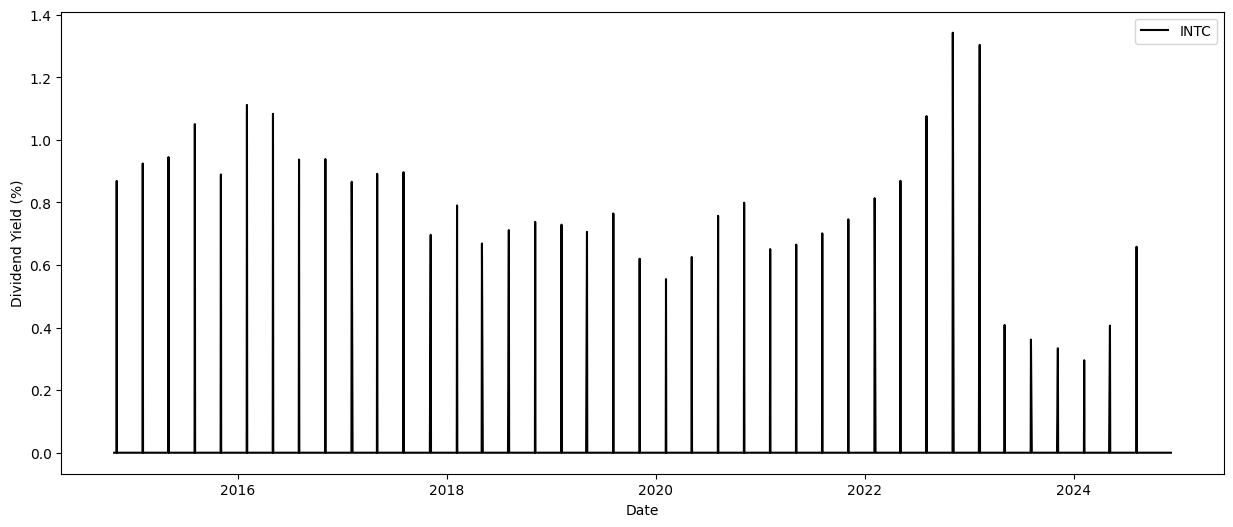

In [16]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate   NaN
share_price     NaN
Name: share_price, dtype: float64


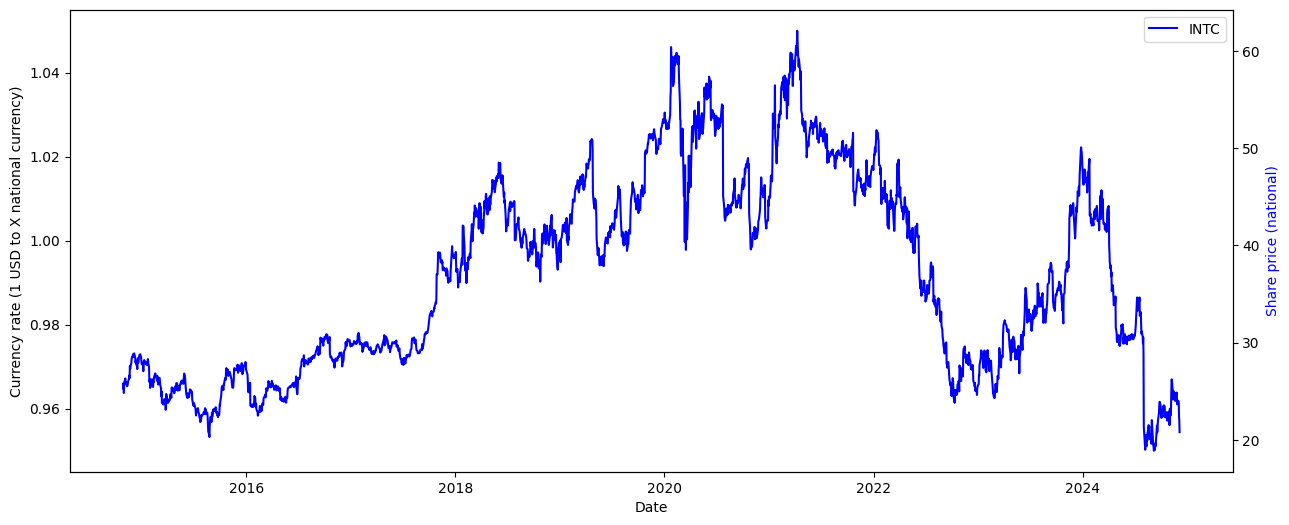

In [17]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

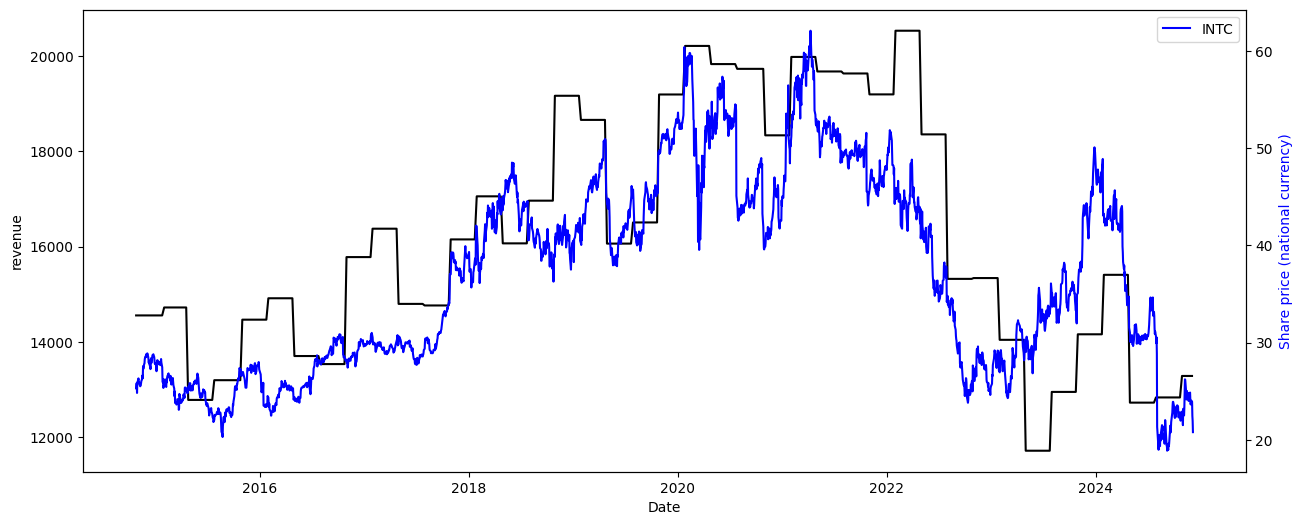

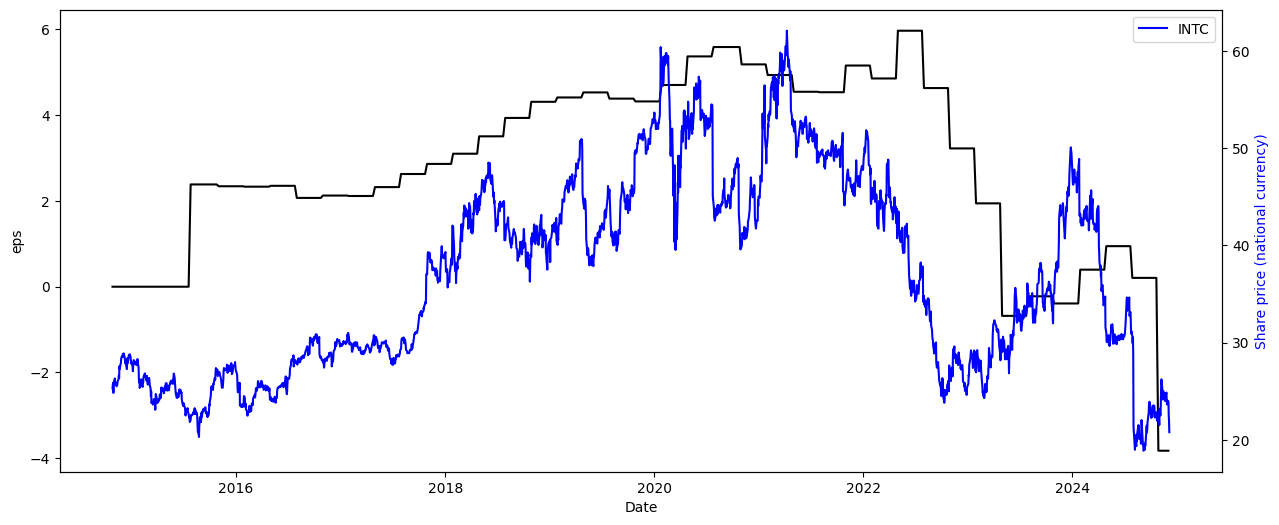

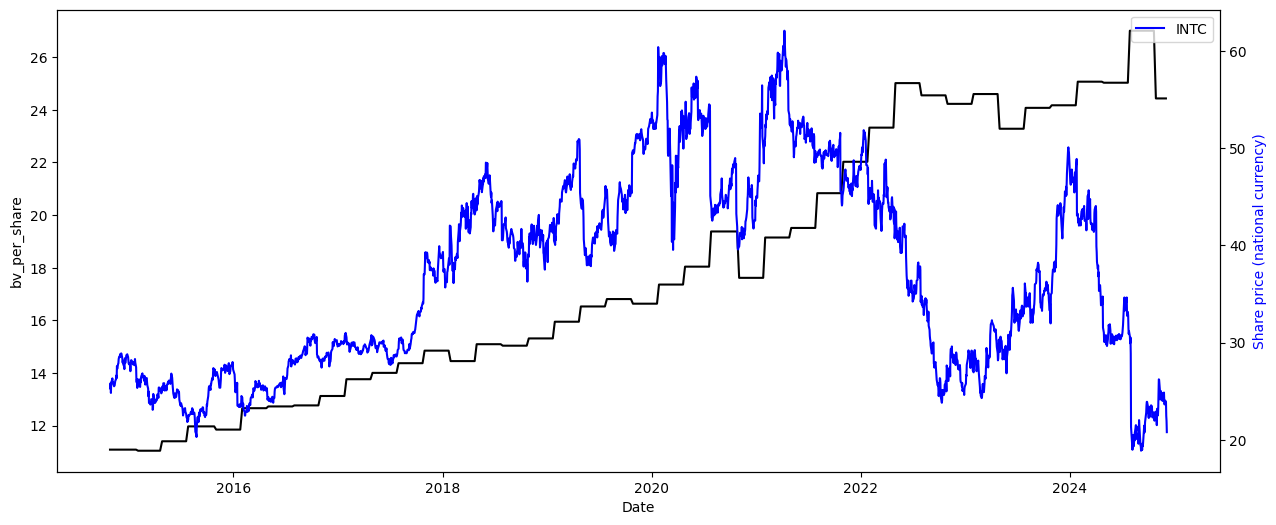

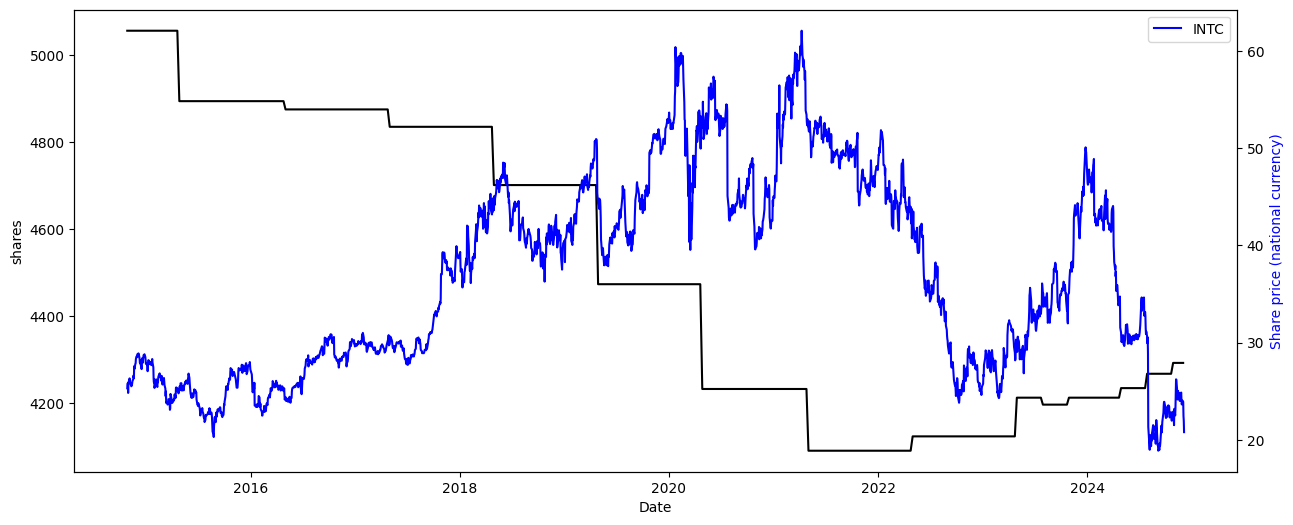

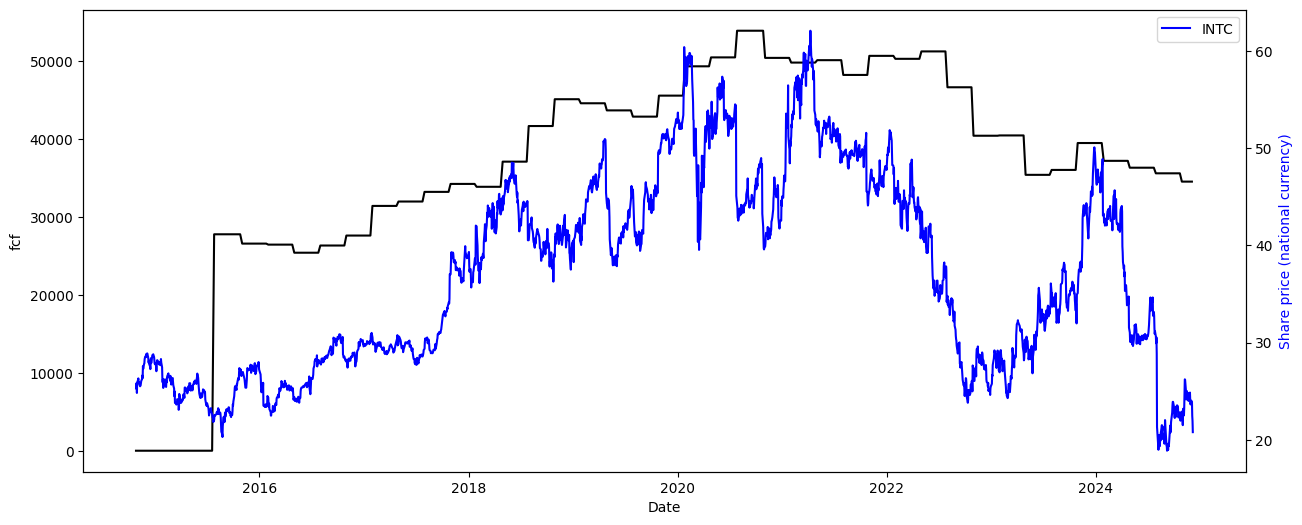

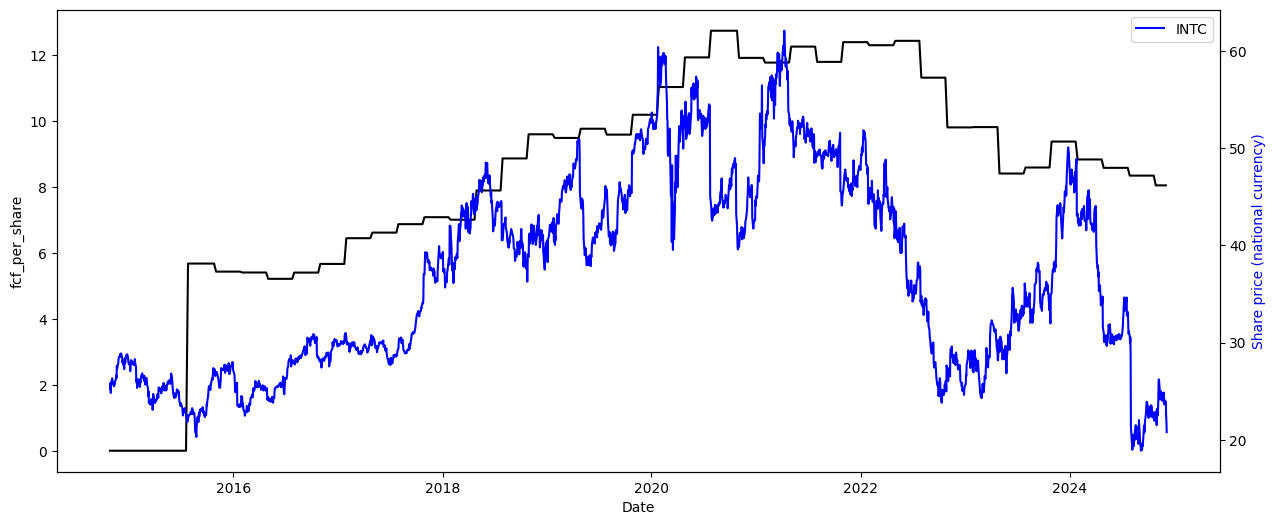

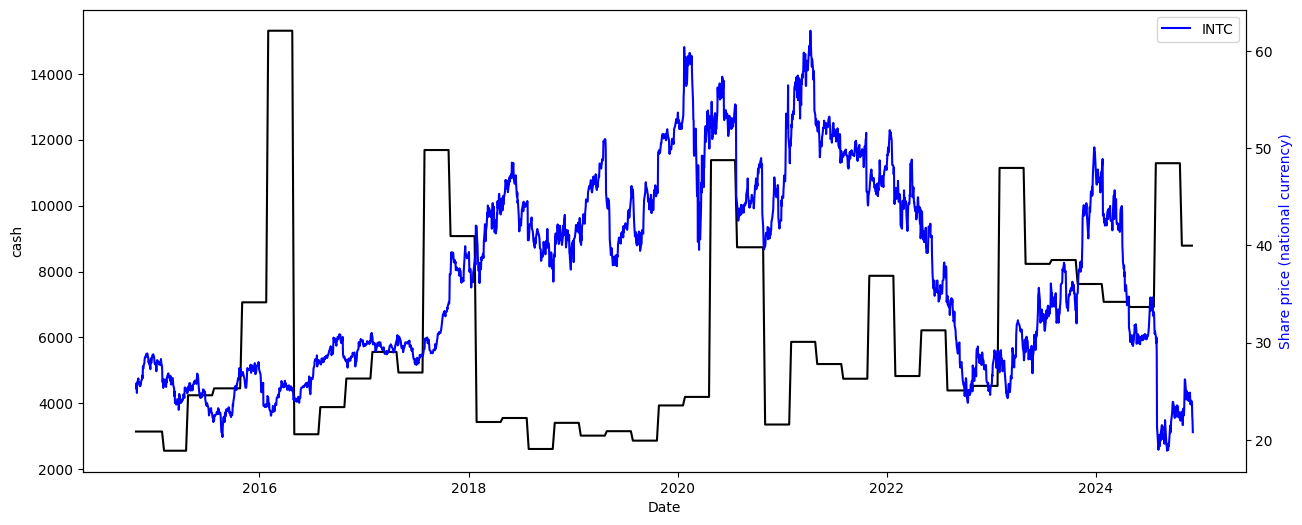

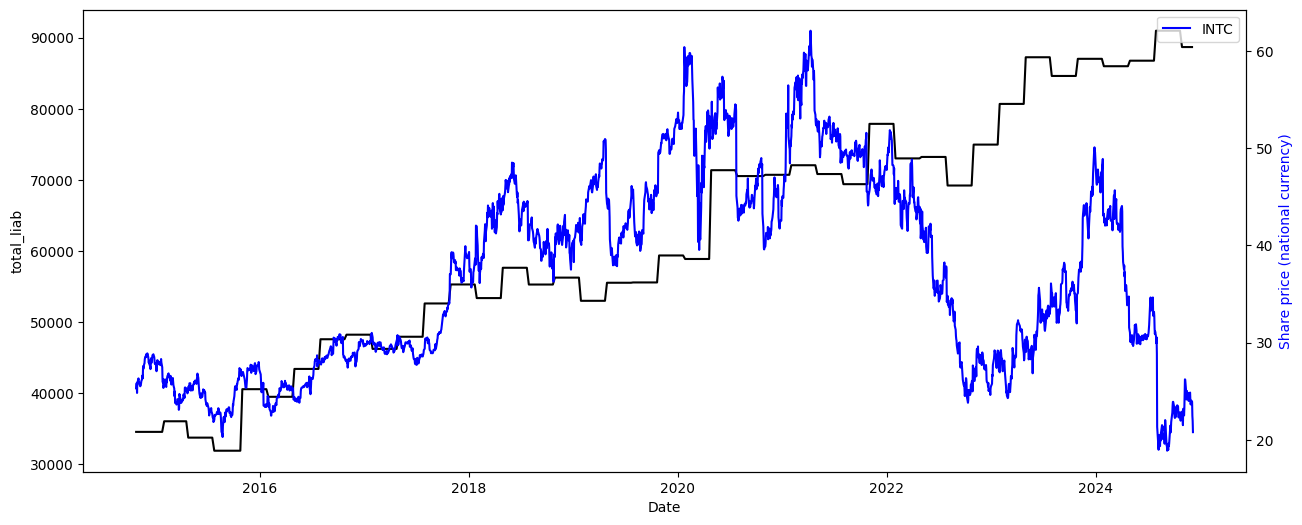

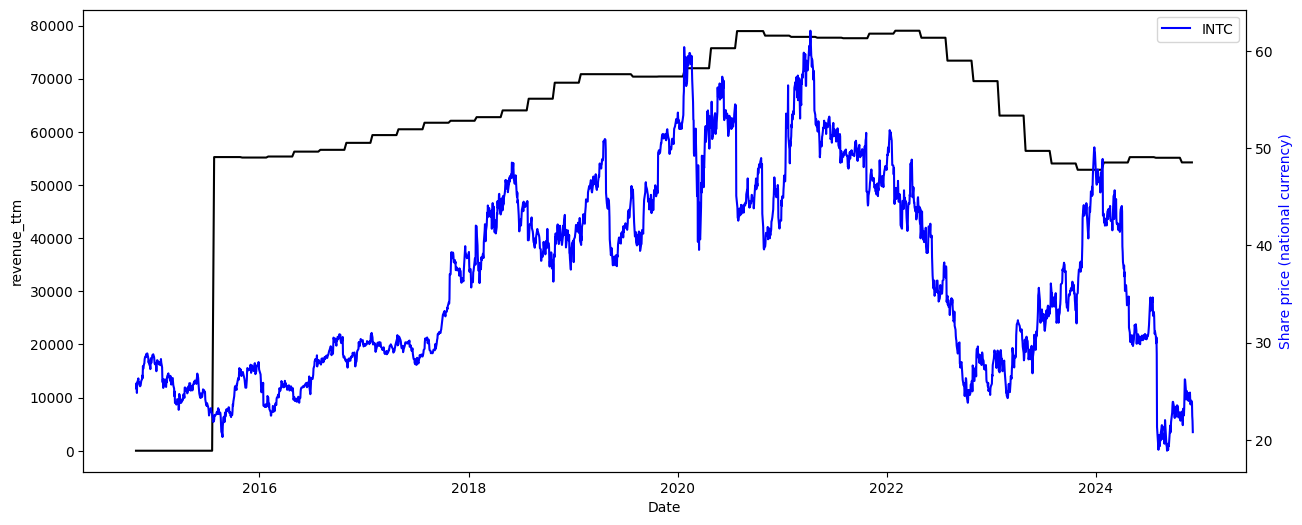

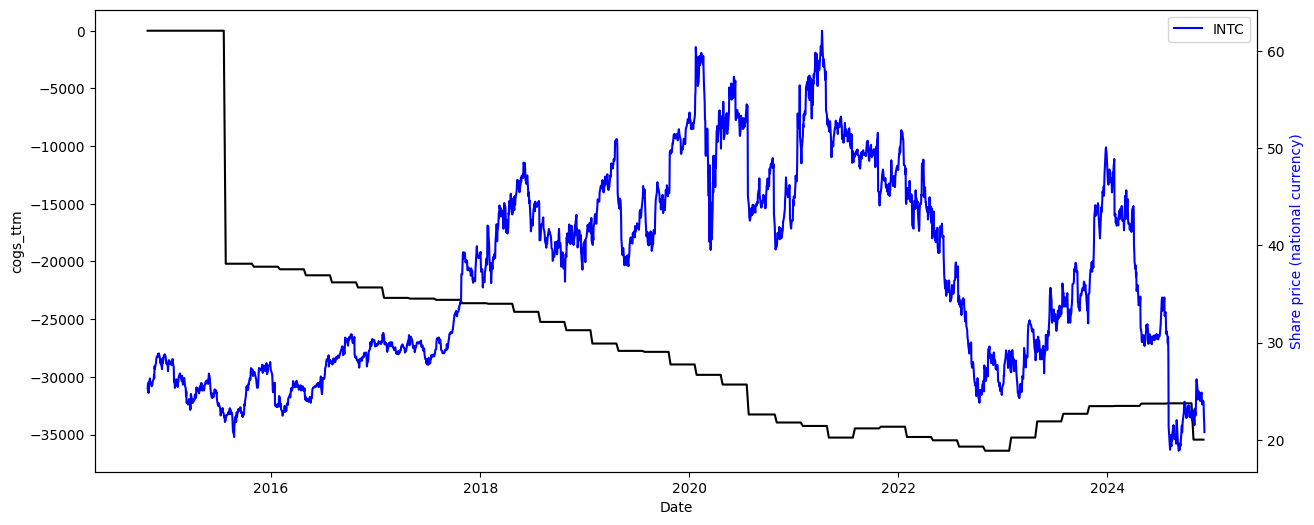

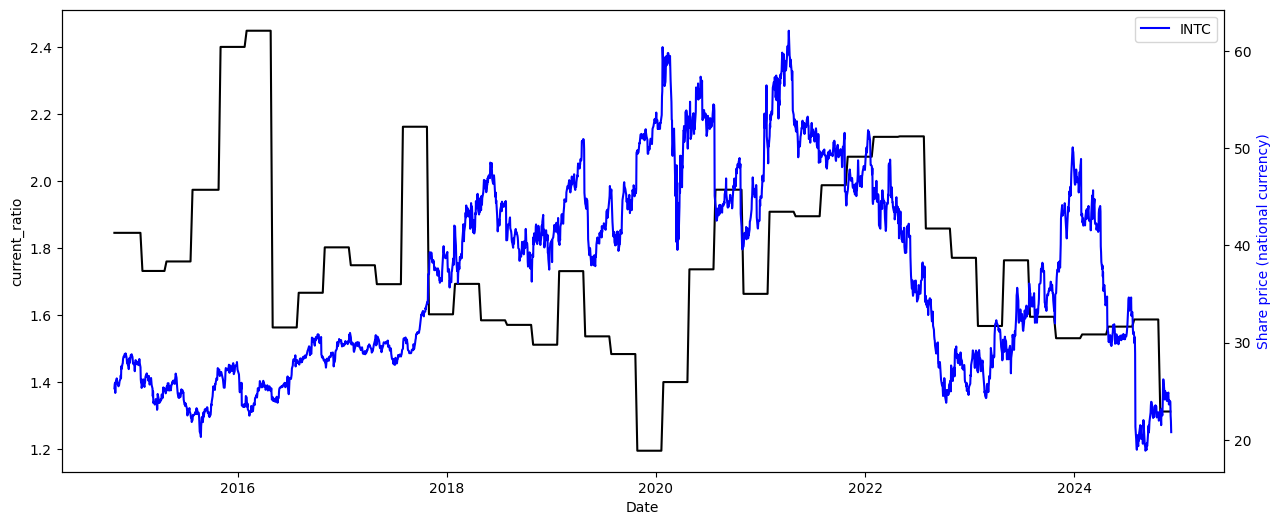

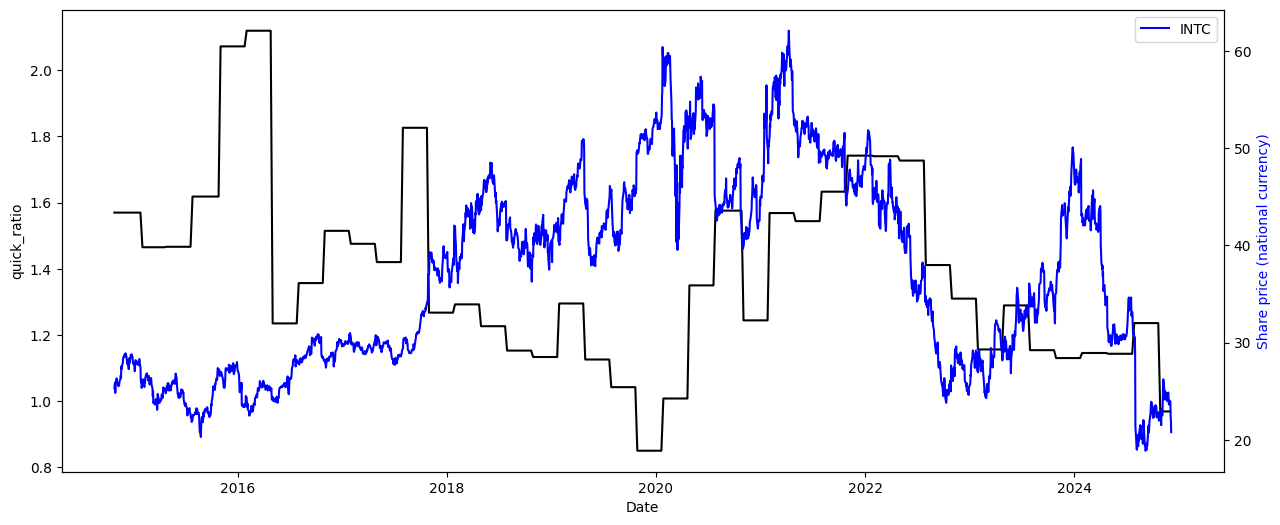

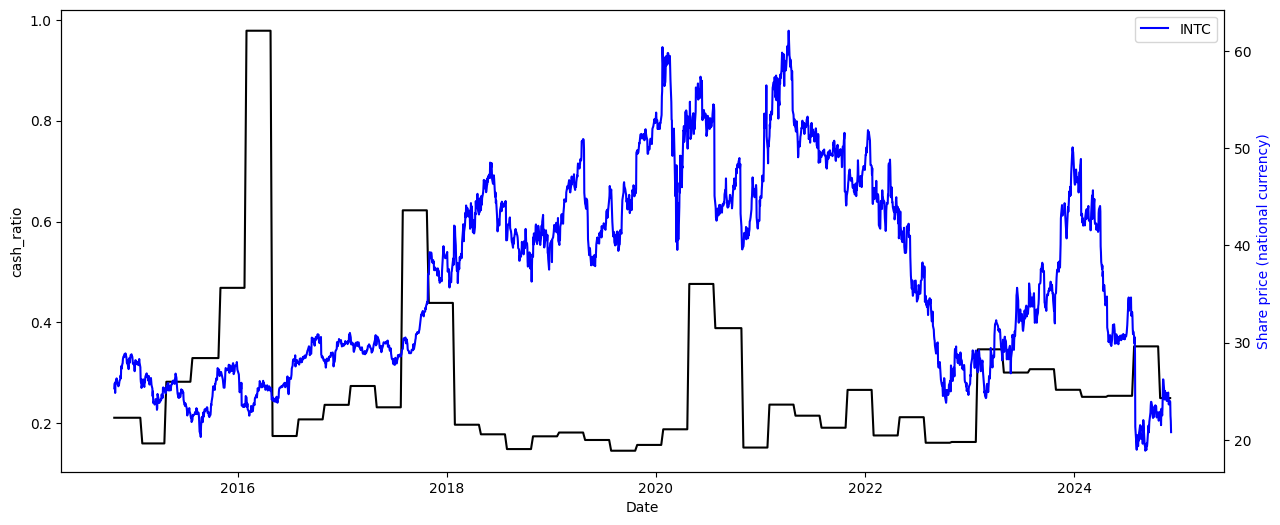

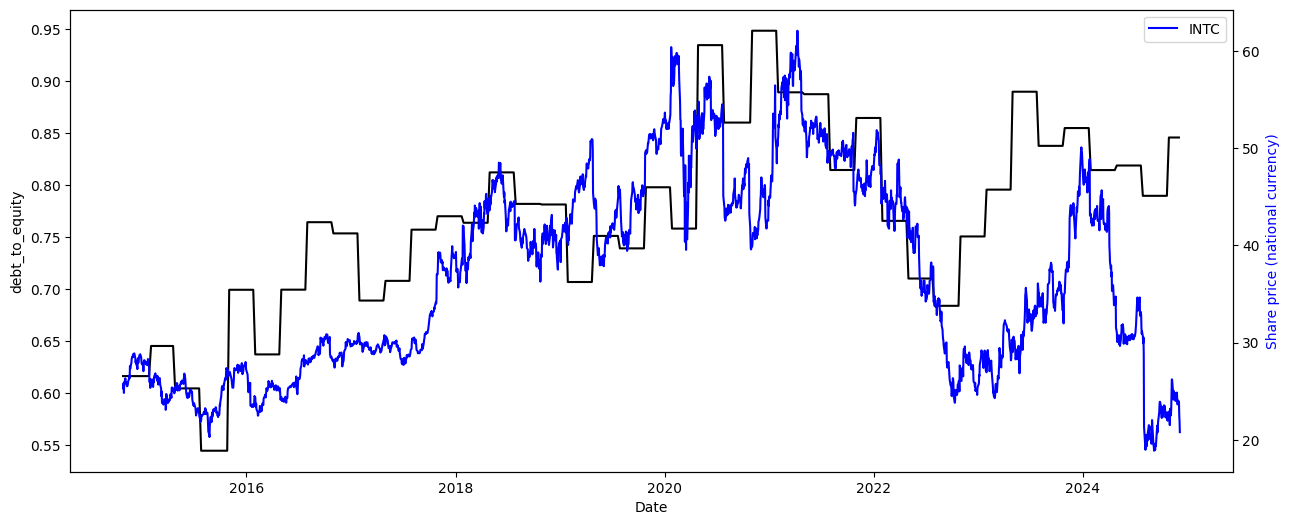

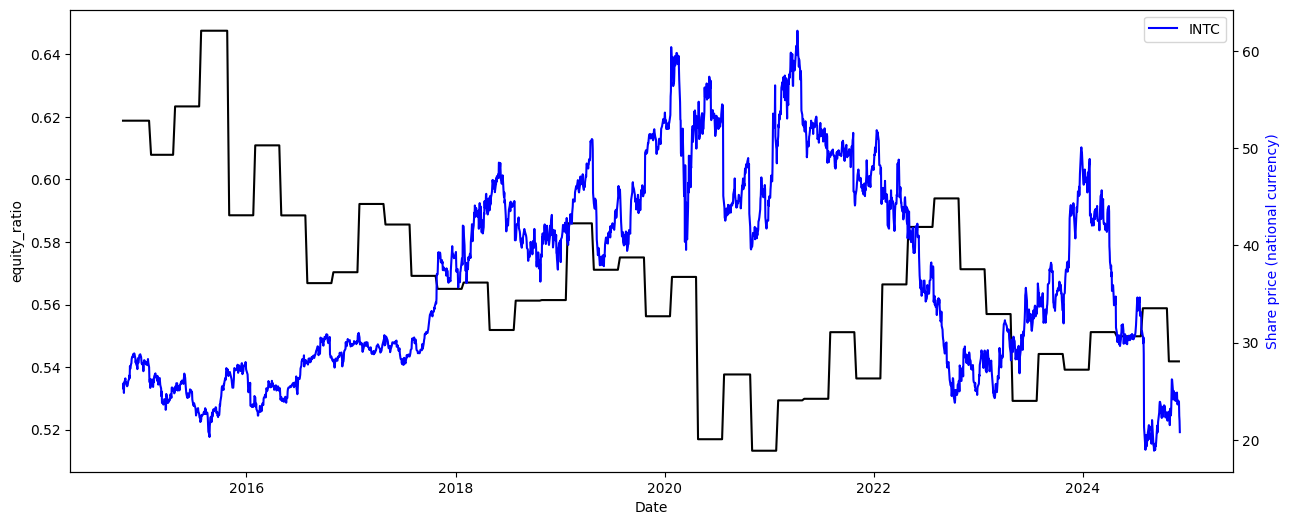

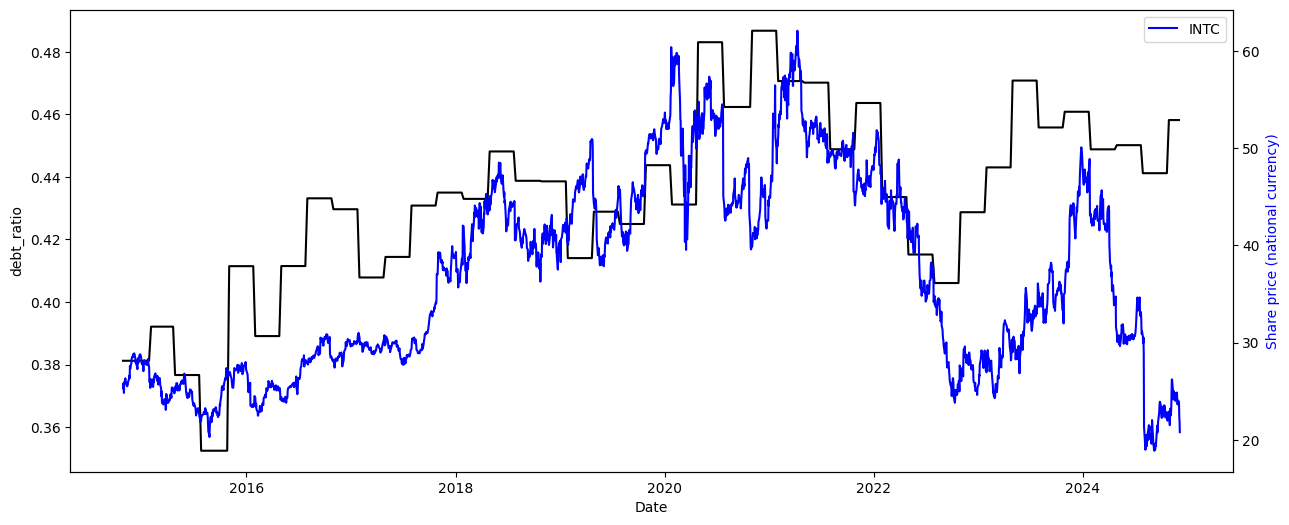

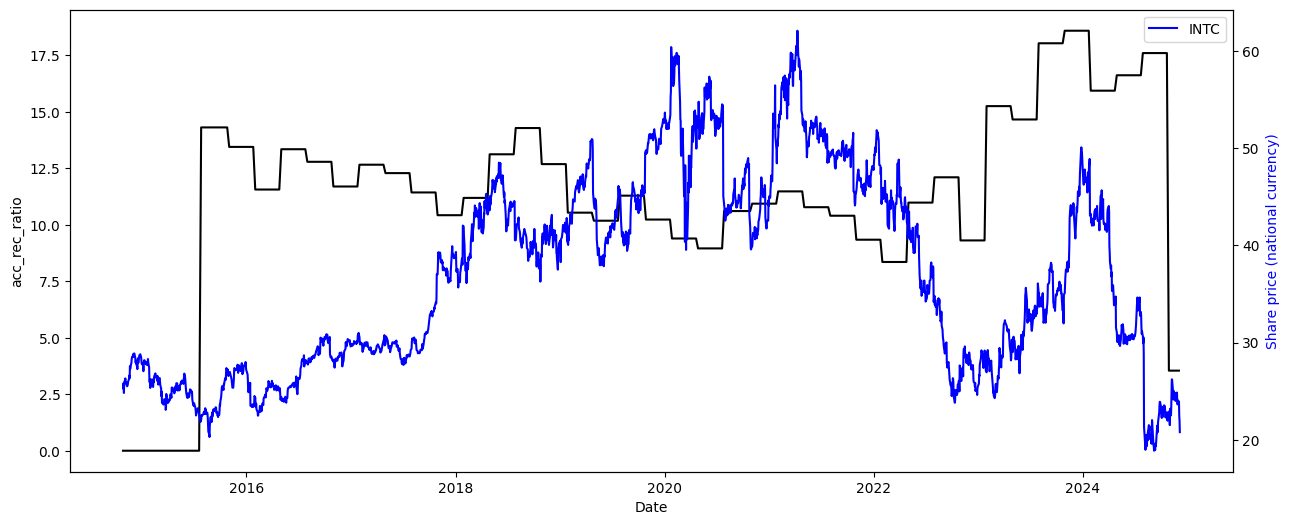

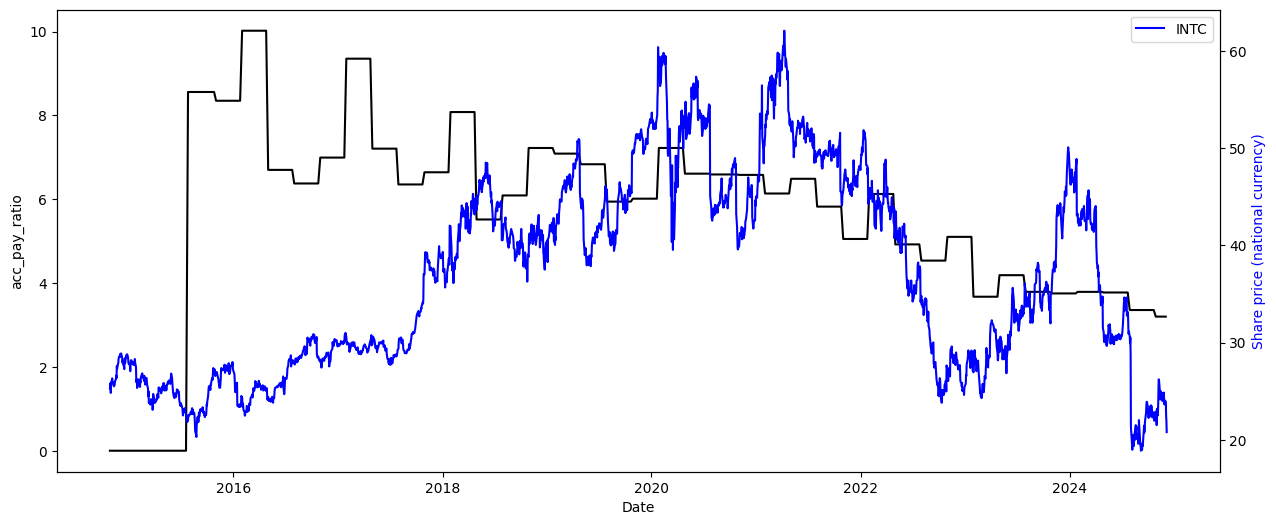

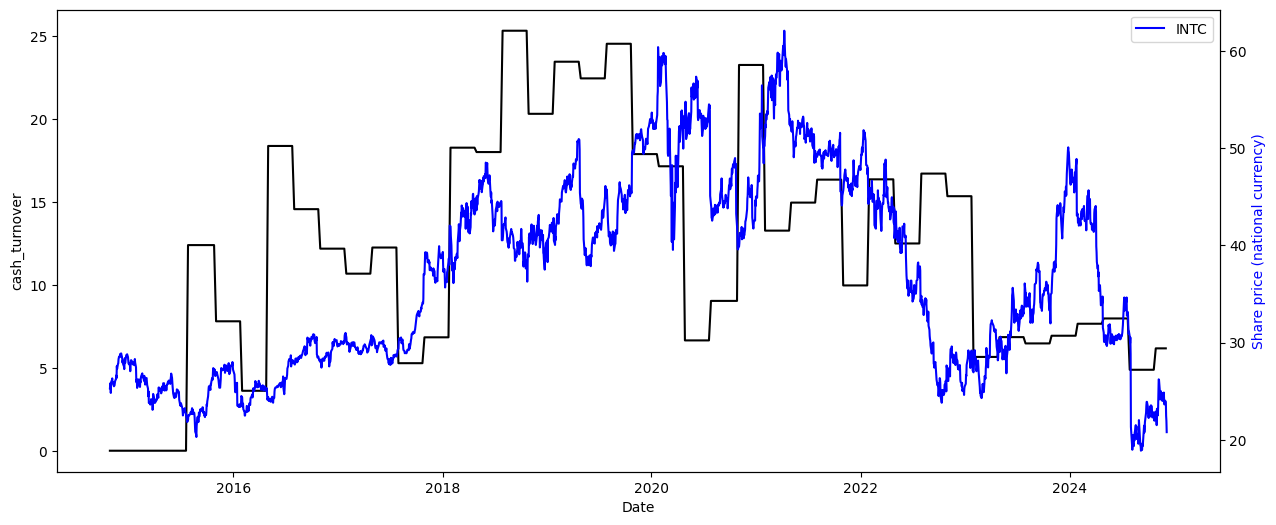

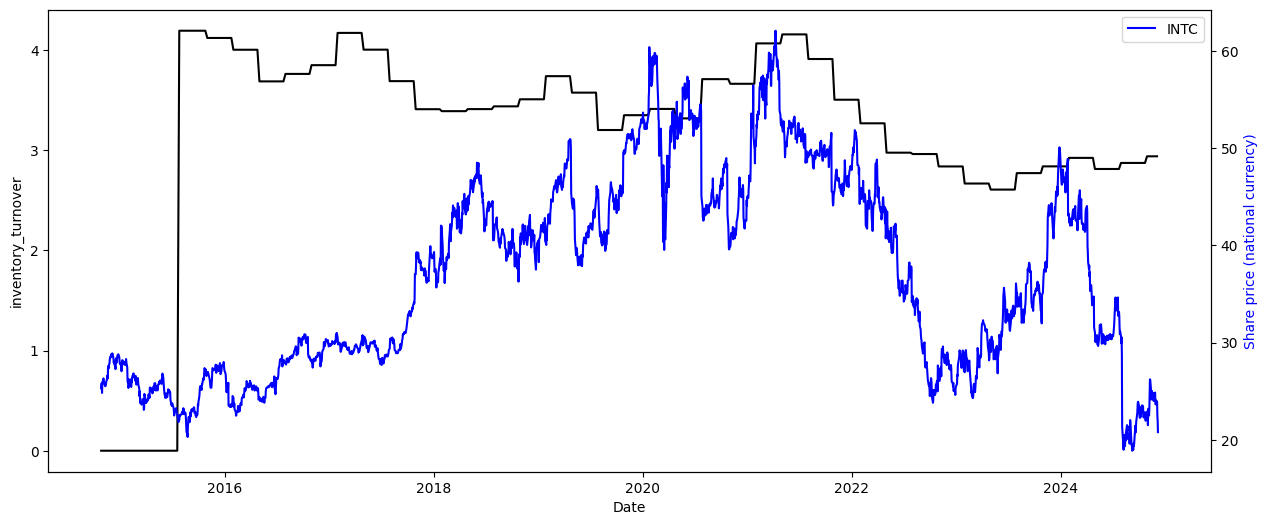

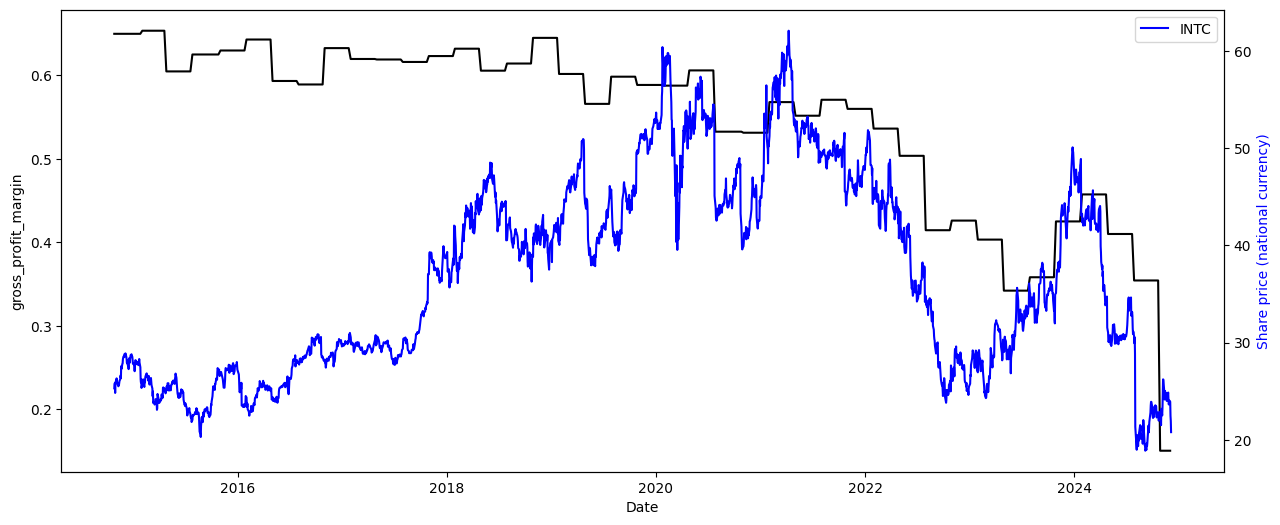

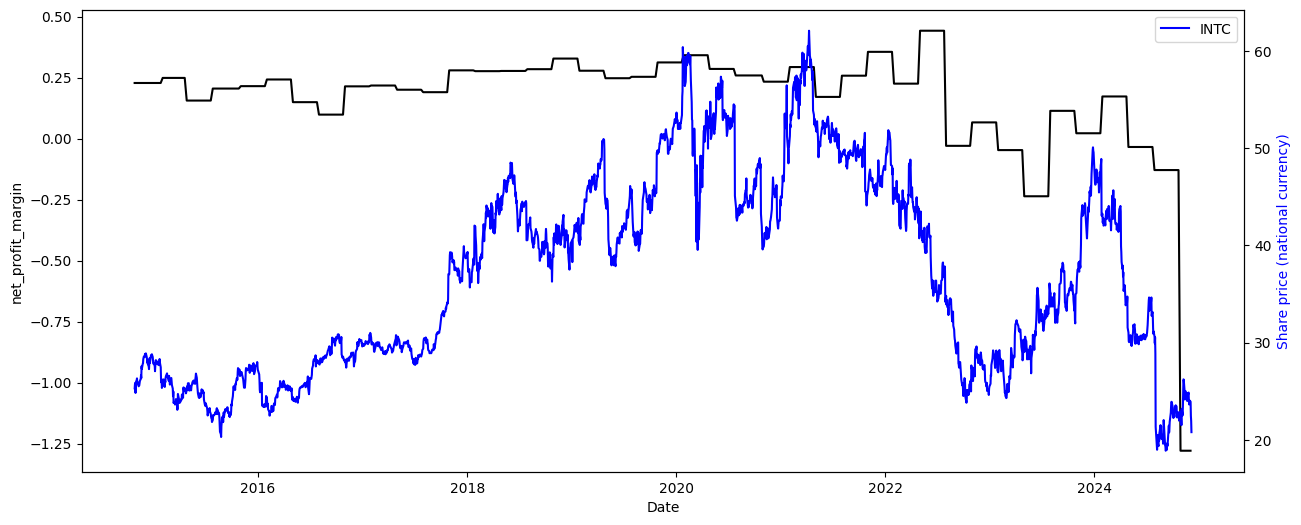

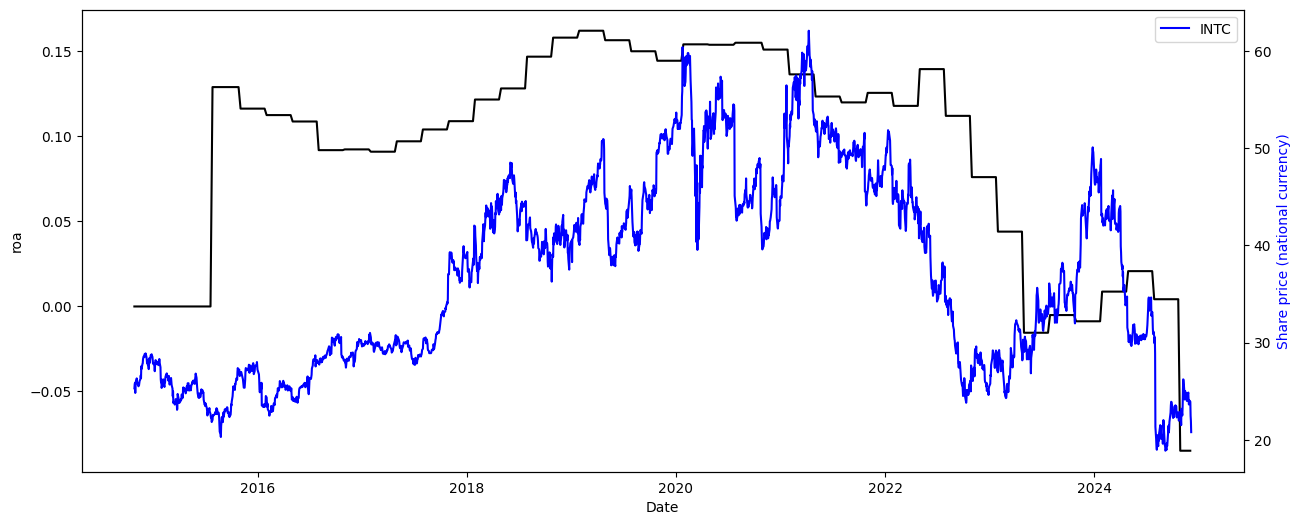

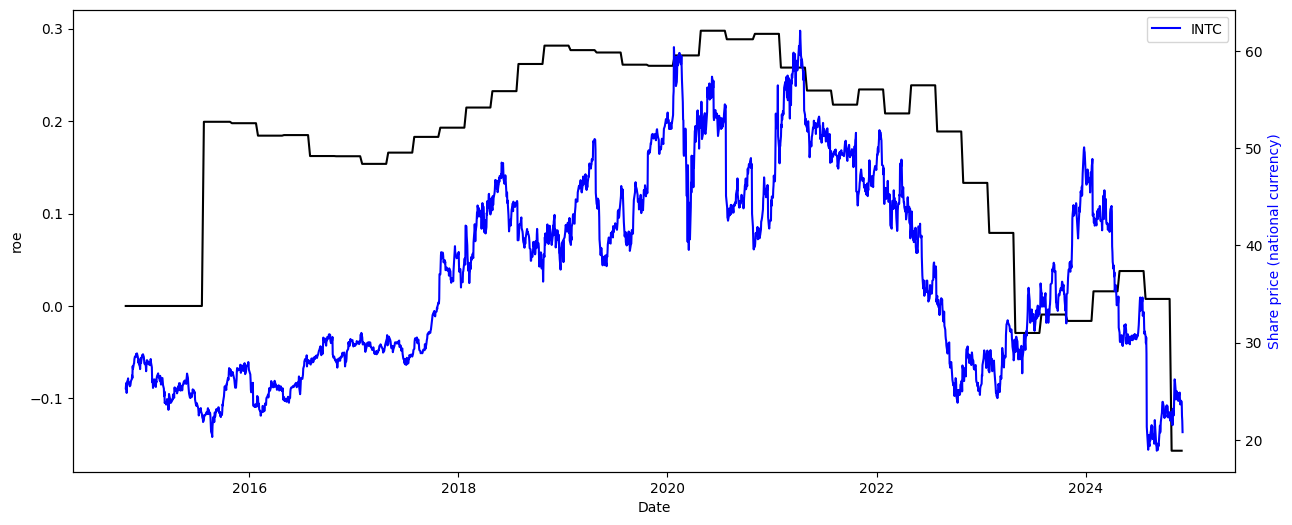

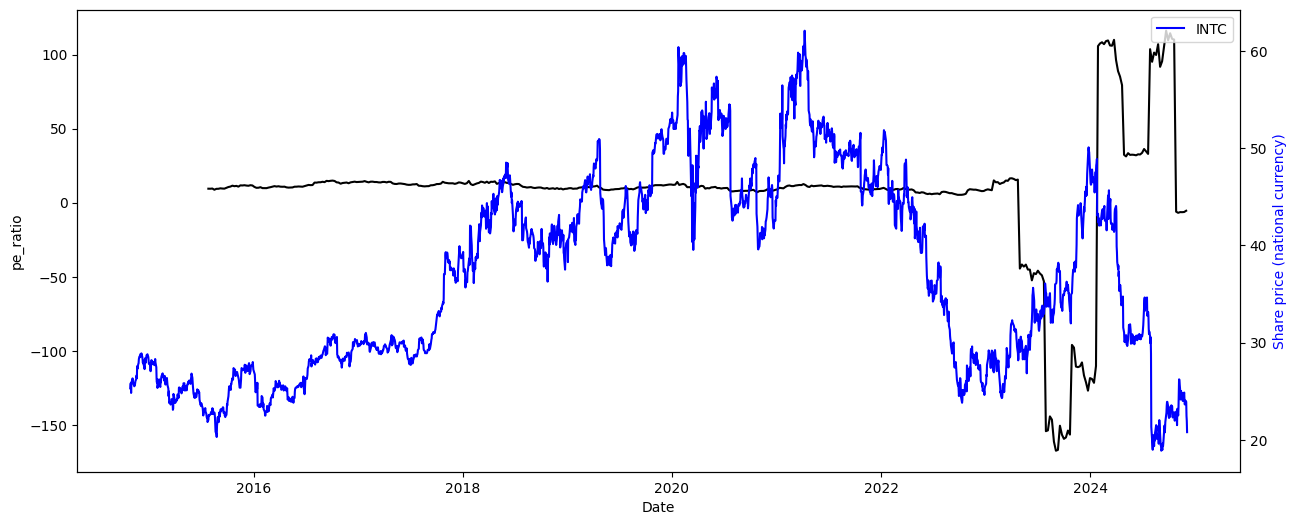

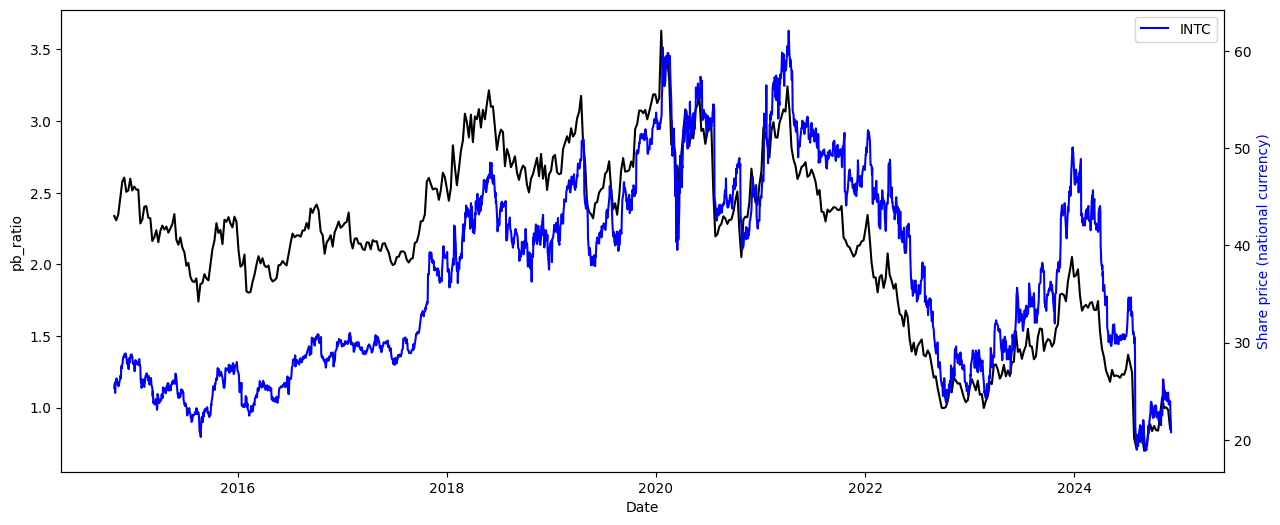

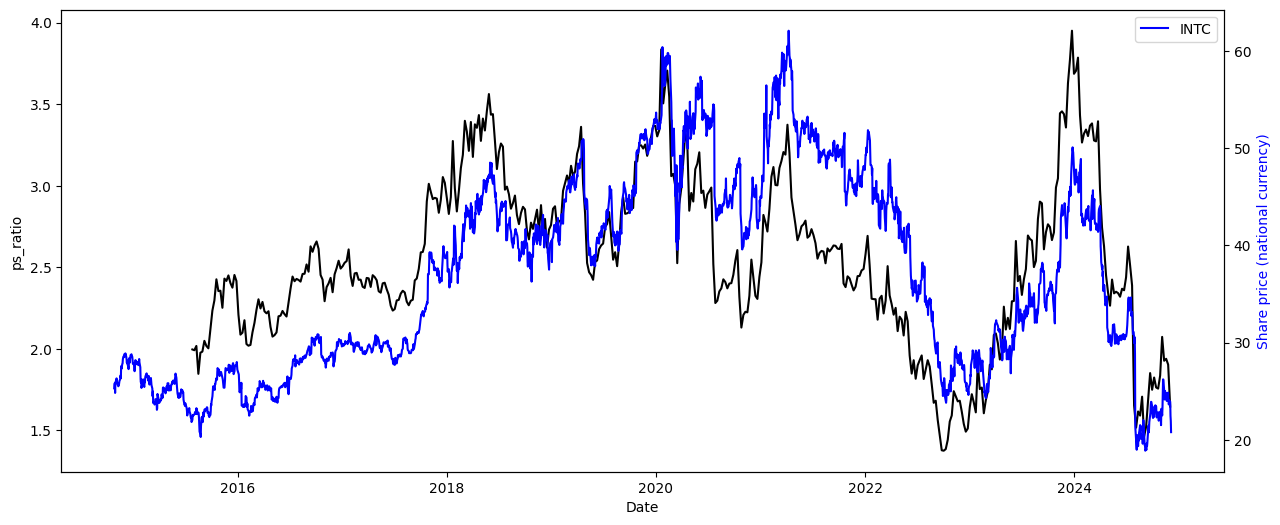

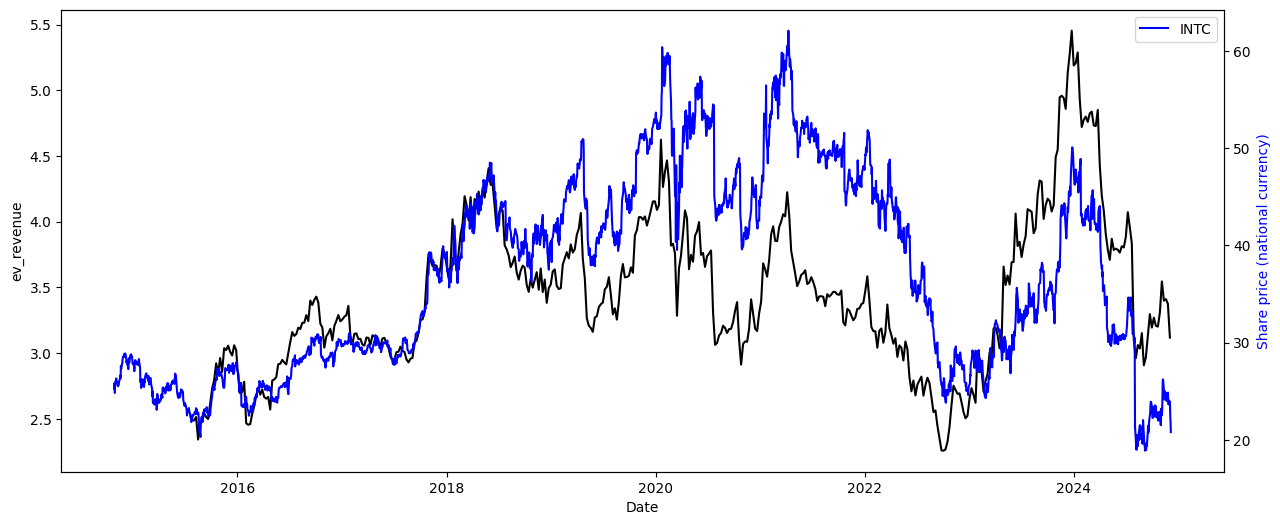

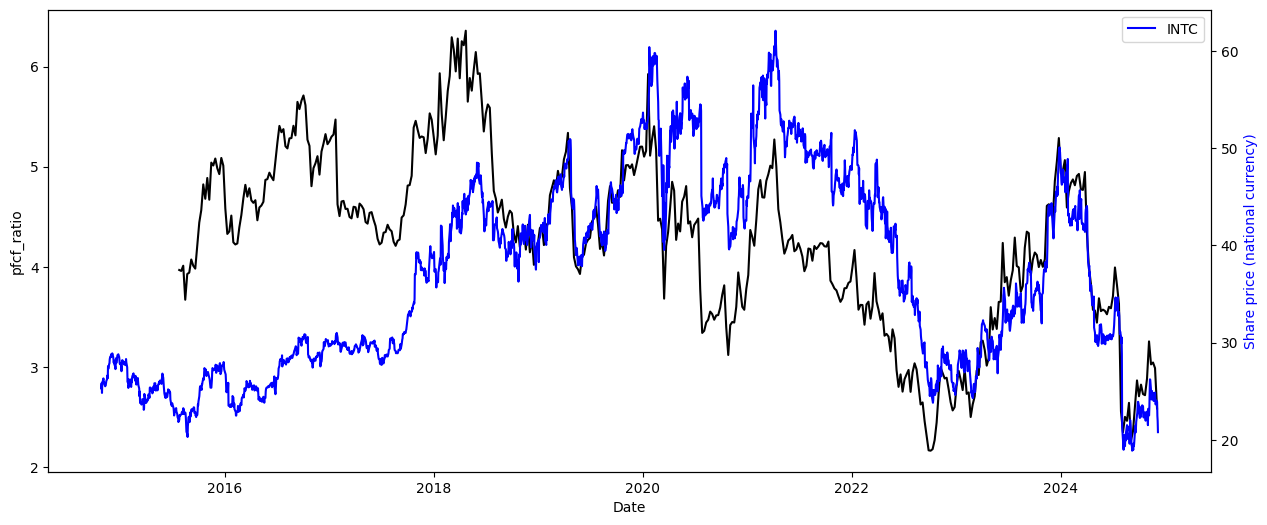

In [18]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

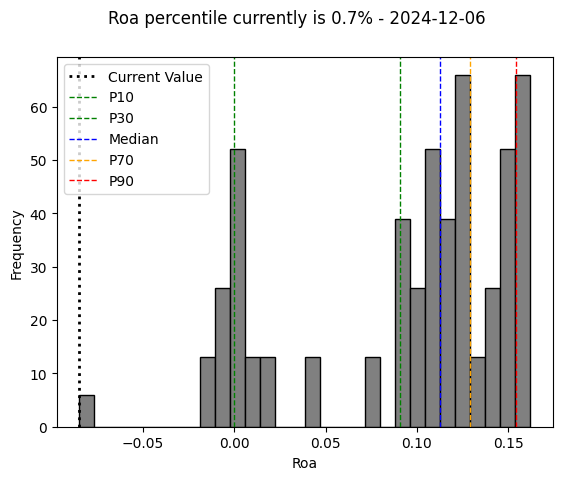

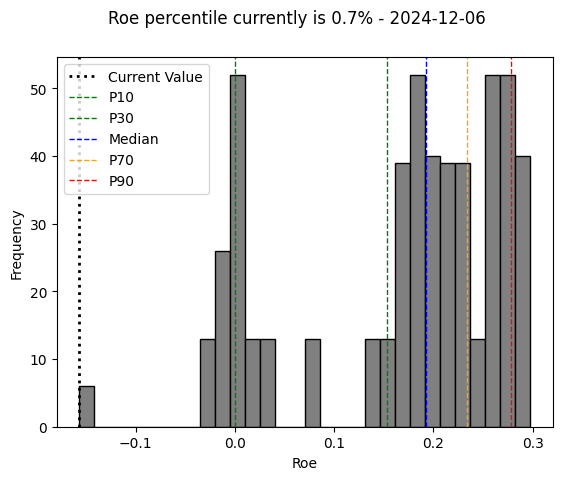

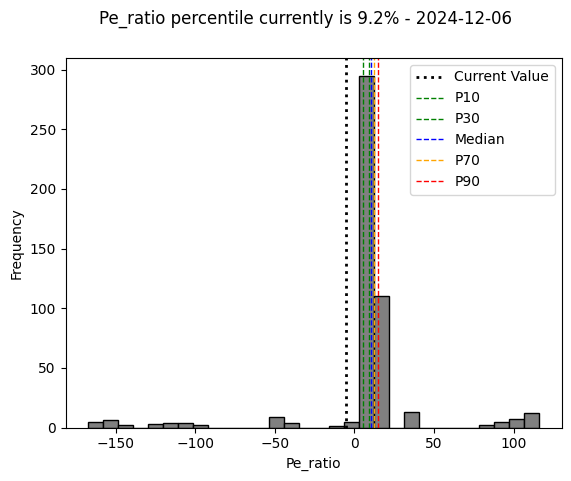

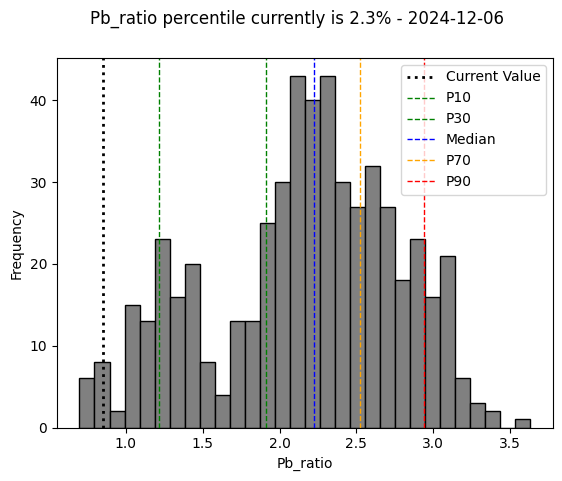

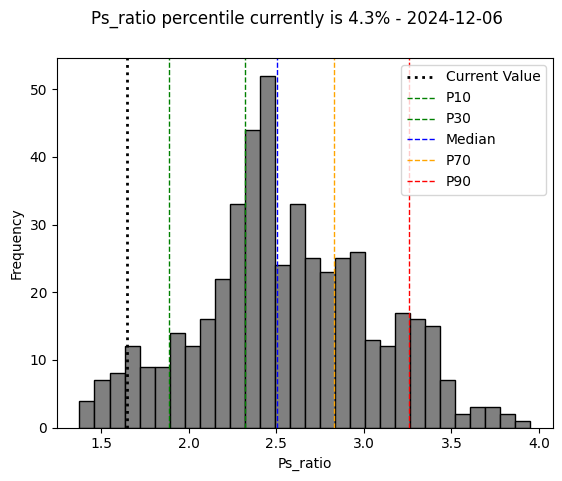

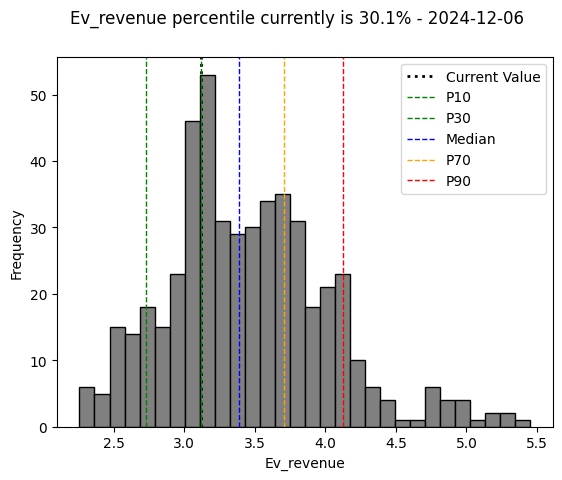

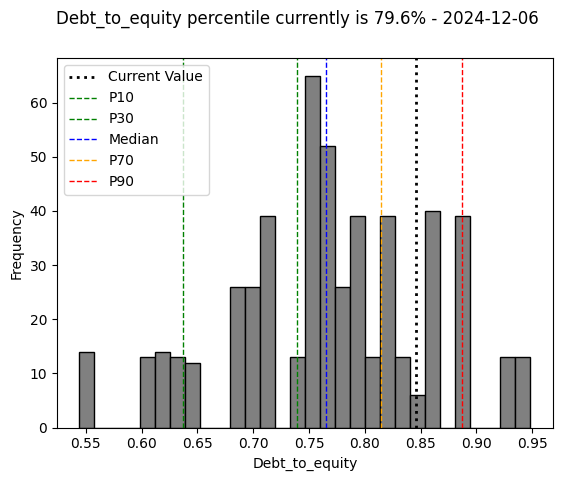

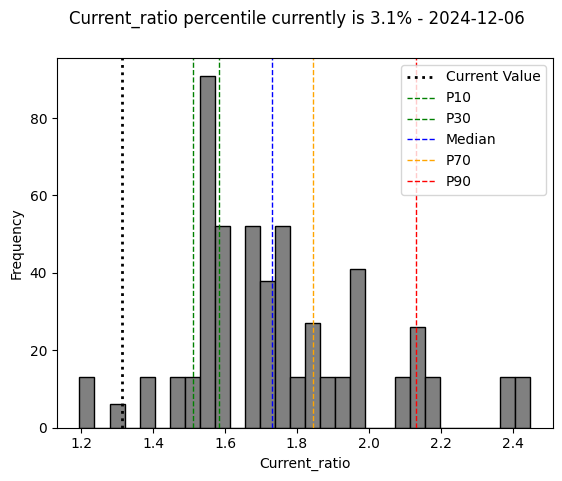

In [19]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [20]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.995851,0.224368,0.621745,0.198743,-0.233600,0.064117,0.170281
roe,0.995851,1.000000,0.222007,0.641163,0.224758,-0.193049,0.137089,0.153478
pe_ratio,0.224368,0.222007,1.000000,0.027805,-0.190400,-0.259069,-0.165725,0.030650
pb_ratio,0.621745,0.641163,0.027805,1.000000,0.751991,0.374570,0.086792,-0.116572
ps_ratio,0.198743,0.224758,-0.190400,0.751991,1.000000,0.874354,0.323651,-0.369533
ev_revenue,-0.233600,-0.193049,-0.259069,0.374570,0.874354,1.000000,0.528595,-0.519221
debt_to_equity,0.064117,0.137089,-0.165725,0.086792,0.323651,0.528595,1.000000,-0.243116
current_ratio,0.170281,0.153478,0.030650,-0.116572,-0.369533,-0.519221,-0.243116,1.000000


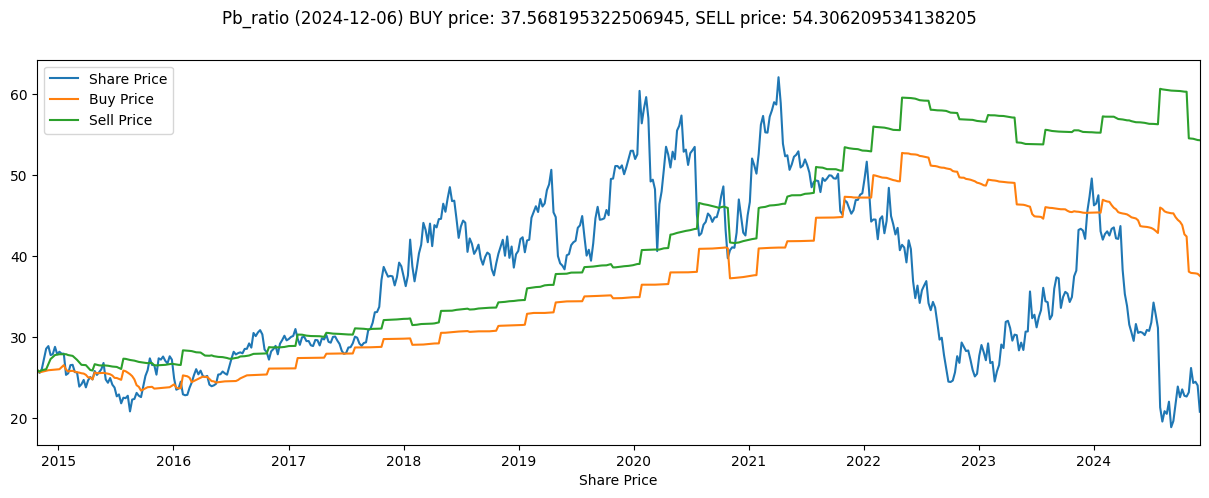

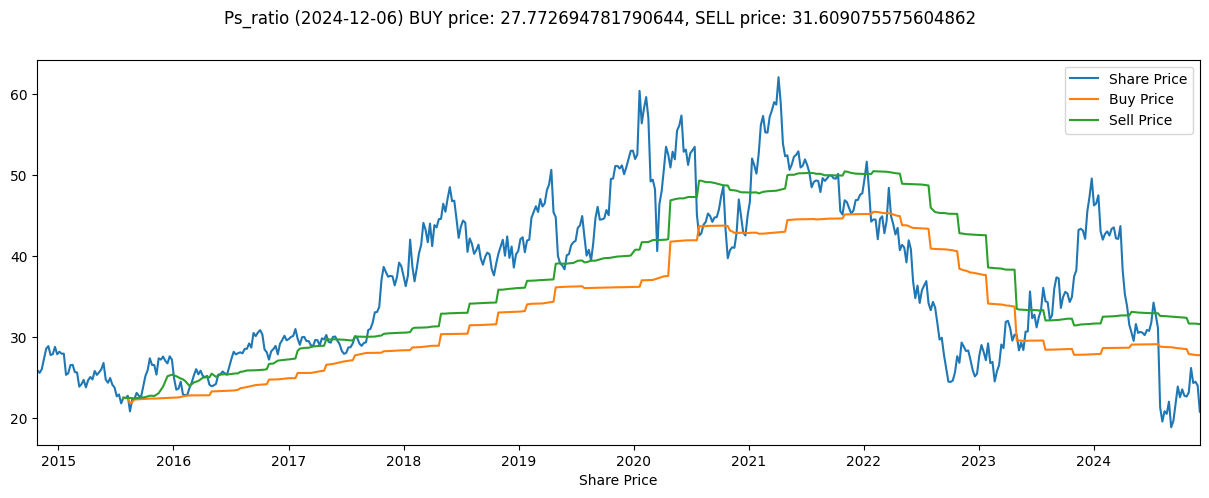

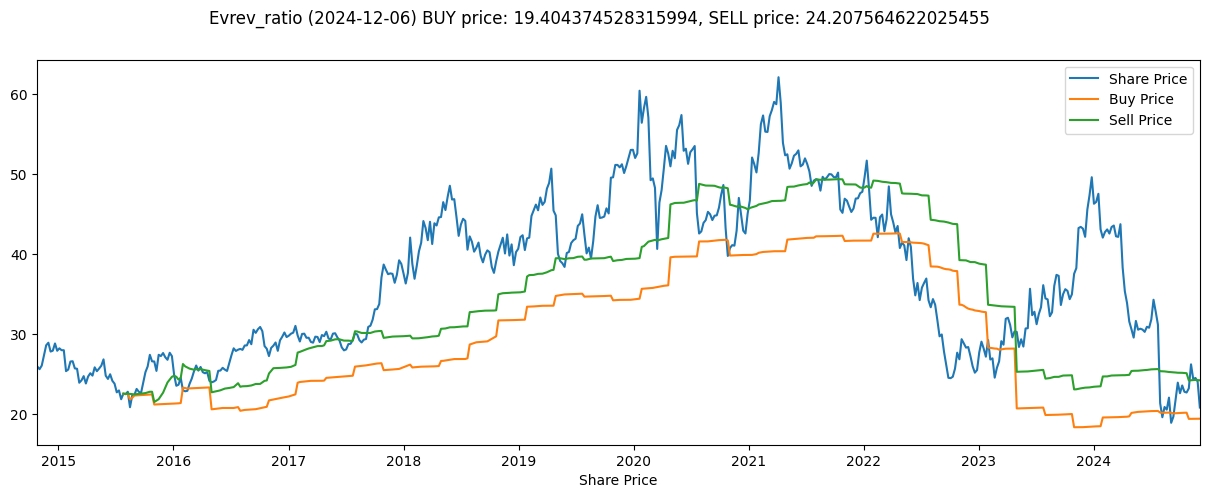

In [21]:
final_df = utils.get_value_stock_target_prices(
    input_df=merged_nat_curr,
    min_pct=0.2,
    max_pct=0.5,
    owned_shares=owned_shares
)